# TALLER 3: ANÁLISIS BIVARIADO

El presente taller presenta dos variables consideradas relevantes para dar solución a la pregunta SMART planteada en el taller 1. Primero se presentarán las variables seleccionadas del conjunto de datos seleccionadas para el análisis explicando su relevancia. En segundo lugar, se presentarán el análisis bivariado. Finalmente se presentan las conclusiones del análisis. Cabe mencionar que no se hará análisis univariado antes del bivariado dado que dicho análisis se llevó a acabo en el taller 2.

CONJUNTO DE DATOS: CONEXIONES ZONA WI-FI DE CALI

El conjunto de datos presenta información diaria del número de conexiones según la zona de conexión para la zona urbana y la zona rural del municipio de Santiago de Cali. Para el análisis no se tendrá en cuenta la zona rural.

Carga de datos

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
from scipy.stats import skew, kurtosis, pearsonr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from logging import log
from math import sqrt
from scipy.stats import levene

In [130]:
data = pd.read_csv('conexiones-zonas-wifi-cali.csv', encoding='latin-1', delimiter = ';')
data

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,USAGE (kB),PORCENTAJE USO
0,1-ene-24,URBANA,001_ZW Parque Ingenio,17,MR76,42,3709424,"424,40%"
1,1-ene-24,URBANA,001_ZW Parque Ingenio,17,MR76,49,2550212,"291,70%"
2,1-ene-24,URBANA,002_ZW Canchas Panamericanas,19,MR76,8,1419251,"162,40%"
3,1-ene-24,URBANA,003_ZW Parque del Perro,19,MR76,31,558191,"63,90%"
4,1-ene-24,URBANA,003_ZW Parque del Perro,19,MR76,26,279273,"31,90%"
...,...,...,...,...,...,...,...,...
13509,30-jun-24,URBANA,054_ZW El Diamante,13,MR76,19,1707901,"366,80%"
13510,30-jun-24,URBANA,055_ZW Polideportivo Petecuy,6,MR76,46,18415,"4,00%"
13511,30-jun-24,URBANA,055_ZW Polideportivo Petecuy,6,MR76,31,4300,"0,90%"
13512,30-jun-24,URBANA,056_ZW Comuna 16,16,MR76,4,35728,"7,70%"


## Presentación de variables del conjunto de datos

Se seleccionaron las variables "NÚMERO CONEXIONES" y "USAGE (GB)". "NÚMERO CONEXIONES" fue seleccionada dado que esta variable nos presenta información sobre la cantidad de conexiones que se realizaron en el día para la zona. Con esta variable podremos llegar a determinar si existe una relación con la variable "USAGE (GB)", se espera que a mayor número de conexiones mayor número de uso de la red. Por otro lado, se seleccionó la variable "USAGE (GB)" dado que esta es la variable que nos va a permitir tomar deciciones entre si es o no necesario ampliar la capacidad ténica de la zona según las predicciones de uso de la misma.

Eliminación de columnas consideradas innecesarias, conversión de unidades columna "USAGE (kB)", ahoira se expresa en GB. Filtro de zona por zona de interés (URBANA).

In [131]:
data['USAGE (kB)'] = data['USAGE (kB)'].astype(float)
data['USAGE (GB)'] = data['USAGE (kB)'] / 1024 / 1024
data = data.drop(['MODEL', 'USAGE (kB)', 'PORCENTAJE USO','NOMBRE ZONA', 'COMUNA'], axis=1)
data_urbana = data[data['AREA'] == 'URBANA']
data_urbana = data_urbana.drop(['AREA'], axis=1)
data_dia = data_urbana.groupby('FECHA CONEXIÓN').sum()
data_dia.sort_values(by='FECHA CONEXIÓN', inplace=True)
data_dia

,NÚMERO CONEXIONES,USAGE (GB)
FECHA CONEXIÓN,,
1-abr-24,3084,100.041924
1-ene-24,2378,83.364192
1-feb-24,3265,132.655735
1-jun-24,3196,95.474055
1-mar-24,3265,114.423812
...,...,...
9-ene-24,2628,123.581715
9-feb-24,3202,114.755839
9-jun-24,3187,27.799615


## Reconocimieto inicial del conjunto de datos

In [102]:
data_dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1-abr-24 to 9-may-24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NÚMERO CONEXIONES  182 non-null    int64  
 1   USAGE (GB)         182 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3+ KB


In [103]:
data_dia.describe()

,NÚMERO CONEXIONES,USAGE (GB)
count,182.000000,182.000000
mean,3151.137363,86.401809
std,421.528812,34.881205
min,2106.000000,20.676723
25%,2885.000000,59.503880
50%,3155.500000,83.317057
75%,3367.250000,111.478727
max,4674.000000,175.165821


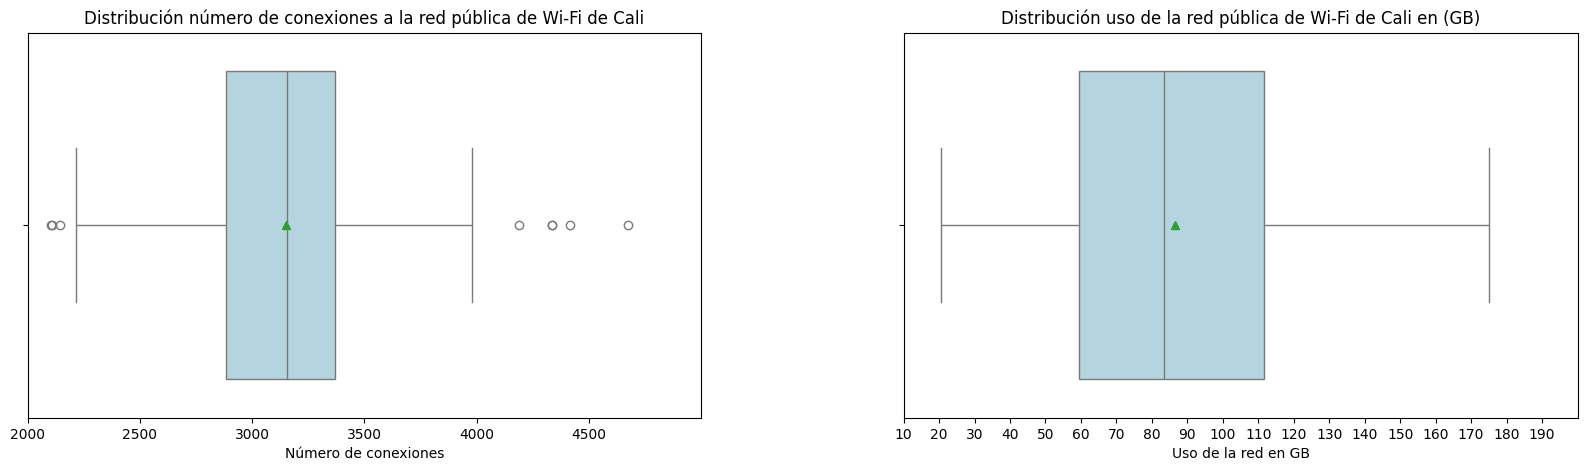

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [104]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
fig.subplots_adjust(wspace=0.3)

plt.figure(figsize=(10,5))
boxplot_usage=sns.boxplot(x=data_dia['NÚMERO CONEXIONES'],color="lightblue",showmeans=True, ax=axs[0])
boxplot_usage.set_xlabel('Número de conexiones')
boxplot_usage.set_xlim(2000, 5000)
boxplot_usage.set_xticks(range(2000, 5000, 500))
boxplot_usage.set_title('Distribución número de conexiones a la red pública de Wi-Fi de Cali')

plt.figure(figsize=(10,5))
boxplot_usage=sns.boxplot(x=data_dia['USAGE (GB)'],color="lightblue",showmeans=True, ax=axs[1])
boxplot_usage.set_xlabel('Uso de la red en GB')
boxplot_usage.set_xlim(10, 200)
boxplot_usage.set_xticks(range(10, 200, 10))
boxplot_usage.set_title('Distribución uso de la red pública de Wi-Fi de Cali en (GB)')


plt.show()

Se puede apreciar que en ambas vaiables existen datos atípicos. La media de la variable "NÚMERO CONEXIONES" es de 3151 conexiones diarias aproximadamente. Con un valor máximo es de 4674 conexiones diarias y un valor mínimo de 2106 conexiones diarias; sabiendo que la desviación estándar es de 421 conexiones diarias proximadamente, podemos concluir que el valor máximo está muy por encima de la media el conjunto de datos, mientras que hay menor dispersión hacia los datos mínimos. Es necesario un tratamiento de outliers para la variable "NÚMERO DE CONEXIONES".

## Imputación de datos por la media

Se selecciona este método de manera arbitraria a falta de cirterios para la selección.

Función de detección e imputación

In [109]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper, # donde sea mayor
       df.mean(),             # colocamos la media
       np.where(              # en otros caso:
           df < lower,        # Cuando sea menor a lower
           df.mean(),         # colocamos la media
           df                 # el resto de las veces dejamos el valor como estaba
           )
       )
   return df

In [132]:
data_dia['NÚMERO CONEXIONES'] = impute_outliers_IQR(data_dia['NÚMERO CONEXIONES'])
data_dia.describe()

,NÚMERO CONEXIONES,USAGE (GB)
count,182.000000,182.000000
mean,3134.148895,86.401809
std,341.599160,34.881205
min,2217.000000,20.676723
25%,2896.250000,59.503880
50%,3151.137363,83.317057
75%,3340.500000,111.478727
max,3979.000000,175.165821


Verificación de imputación

Text(0.5, 1.0, 'Distribución número de conexiones a la red pública de Wi-Fi de Cali')

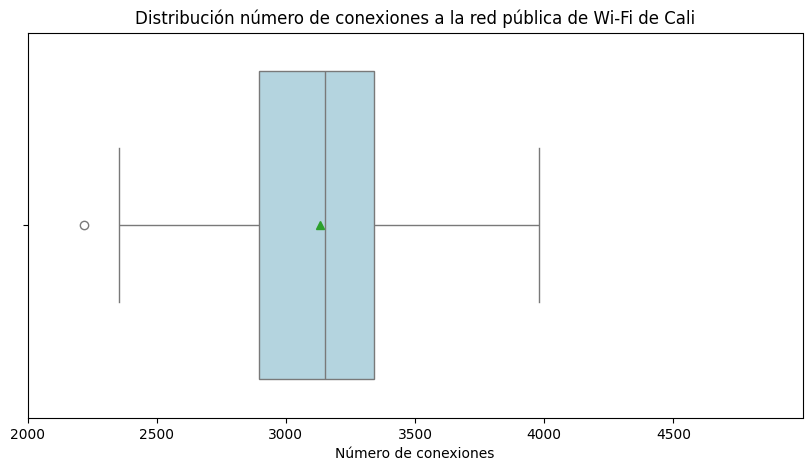

In [133]:
plt.figure(figsize=(10,5))
boxplot_usage=sns.boxplot(x=data_dia['NÚMERO CONEXIONES'],color="lightblue",showmeans=True)
boxplot_usage.set_xlabel('Número de conexiones')
boxplot_usage.set_xlim(2000, 5000)
boxplot_usage.set_xticks(range(2000, 5000, 500))
boxplot_usage.set_title('Distribución número de conexiones a la red pública de Wi-Fi de Cali')

## Verificación de supuestos:

#### Verificación de supuesto de normalidad:

- Ho: La muestra proviene de una población que sigue una distribución normal
- Ha: La muestra NO proviene de una población que sigue una distribución normal

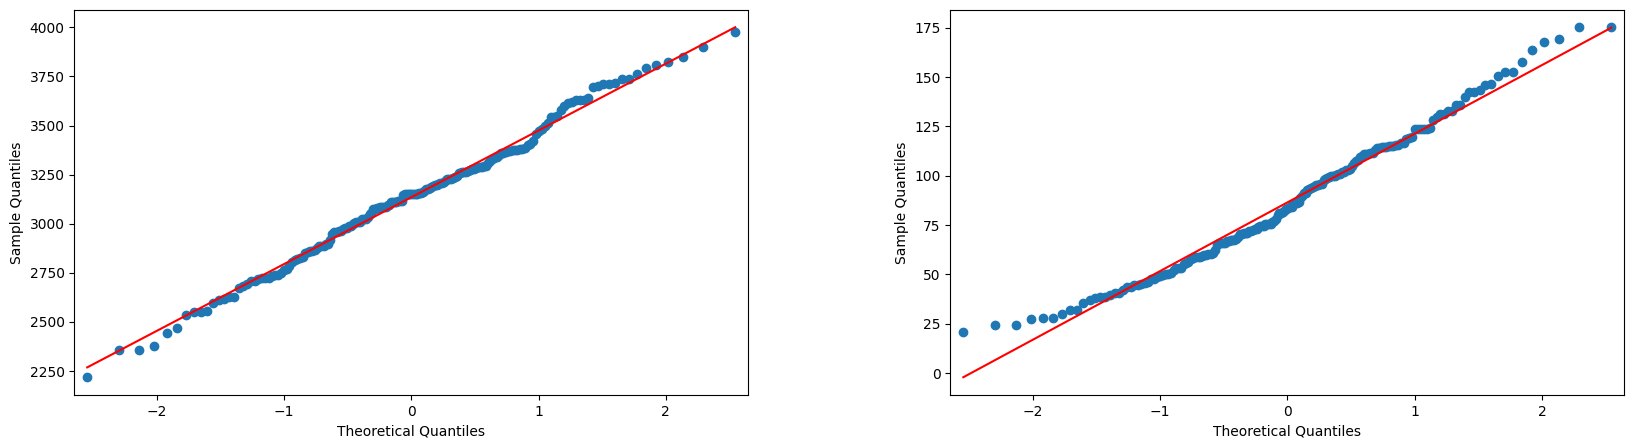

In [134]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
fig.subplots_adjust(wspace=0.3)

ax1=qqplot(data_dia["NÚMERO CONEXIONES"], line='s',ax=axs[0])
ax2=qqplot(data_dia["USAGE (GB)"], line='s',ax=axs[1])
plt.show()

In [135]:
print("Número de conexiones")
Estad,vp = shapiro(data_dia["NÚMERO CONEXIONES"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data_dia["NÚMERO CONEXIONES"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

print("Uso de la red (GB)")
Estad,vp = shapiro(data_dia["USAGE (GB)"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data_dia["USAGE (GB)"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

Número de conexiones
Estadístico SW= 0.9929790187882229, Valor-p= 0.5324546834939561
Estadístico AD= 0.43914890219531344, Valor crítico (sign. 5%)= 0.771

Uso de la red (GB)
Estadístico SW= 0.9804815467911084, Valor-p= 0.011916035480267888
Estadístico AD= 0.8016096582454679, Valor crítico (sign. 5%)= 0.771



**Conclusión**: dado que el estadístico de prueba (p) en ambas variables es menor que 0.05 se rechaza hipótesis nula. Por tanto, se concluye que las variables no siguen una distribución normal. Se procede a hacer una trasformación logarítmica y raíz cuadrada para intentar garantizar el supuesto de normalidad.

In [136]:
data_dia['NÚMERO CONEXIONES_log'] = np.log(data_dia['NÚMERO CONEXIONES']) + 1
data_dia['USAGE (GB)_sqrt'] = np.sqrt(data_dia['USAGE (GB)'])
data_dia

,NÚMERO CONEXIONES,USAGE (GB),NÚMERO CONEXIONES_log,USAGE (GB)_sqrt
FECHA CONEXIÓN,,,,
1-abr-24,3084.0,100.041924,9.033983,10.002096
1-ene-24,2378.0,83.364192,8.774015,9.130399
1-feb-24,3265.0,132.655735,9.091015,11.517627
1-jun-24,3196.0,95.474055,9.069655,9.771083
1-mar-24,3265.0,114.423812,9.091015,10.696907
...,...,...,...,...
9-ene-24,2628.0,123.581715,8.873978,11.116731
9-feb-24,3202.0,114.755839,9.071531,10.712415
9-jun-24,3187.0,27.799615,9.066835,5.272534


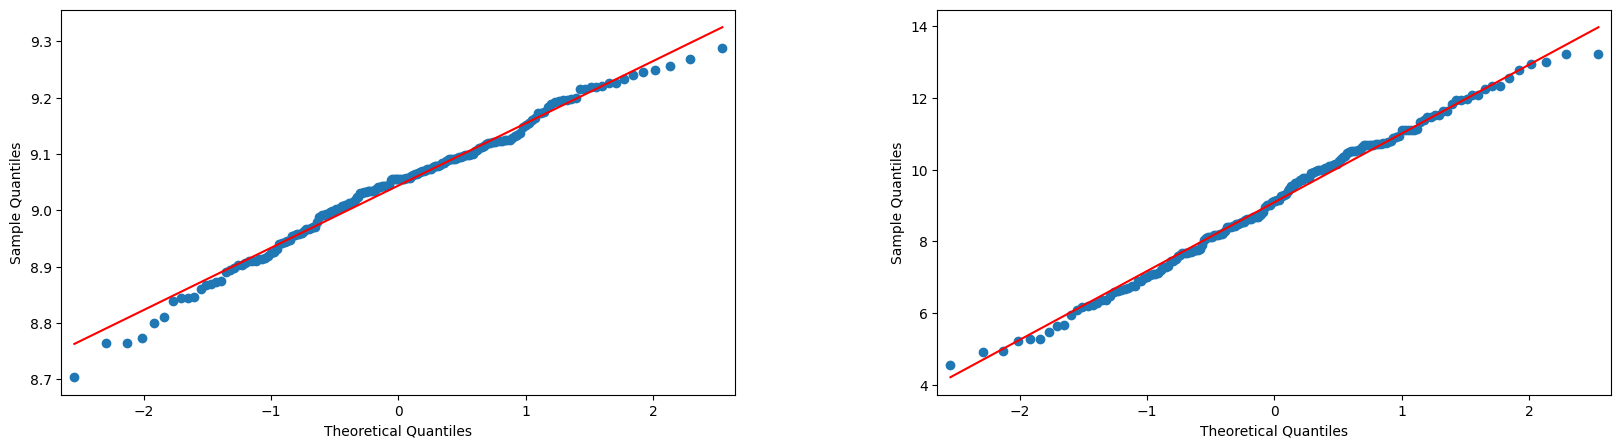

In [137]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
fig.subplots_adjust(wspace=0.3)

ax1=qqplot(data_dia["NÚMERO CONEXIONES_log"], line='s',ax=axs[0])
ax2=qqplot(data_dia["USAGE (GB)_sqrt"], line='s',ax=axs[1])
plt.show()

In [128]:
print("Número de conexiones")
Estad,vp = shapiro(data_dia["NÚMERO CONEXIONES_log"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data_dia["NÚMERO CONEXIONES_log"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

print("Uso de la red (GB)")
Estad,vp = shapiro(data_dia["USAGE (GB)_sqrt"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data_dia["USAGE (GB)_log"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

Número de conexiones
Estadístico SW= 0.9880142677400678, Valor-p= 0.1264780667853453
Estadístico AD= 0.6405170971056862, Valor crítico (sign. 5%)= 0.771

Uso de la red (GB)
Estadístico SW= 0.9897655595312345, Valor-p= 0.21725466370881158
Estadístico AD= 1.4612711705682102, Valor crítico (sign. 5%)= 0.771



Dado que las distribuciones de las varaibales se beneficiaron de las transformaciones aplicadas, se procede con el siguiente supuesto.

#### Verificación de supuesto de varianza:

- Ho: la varianza en ambas poblaciones es igual
- Ha: la varianza difiere entre poblaciones

Prueba de Levene para dos o más categorías

In [139]:
Estad,vp=levene(data_dia["NÚMERO CONEXIONES_log"], data_dia["USAGE (GB)_sqrt"], center='mean')
print(f'Estadístico W= {Estad}, Valor-p= {vp}')

Estadístico W= 360.9246077659124, Valor-p= 2.5255288257213936e-56


**Conclusión**: según el estadistico p obtenido en la prueba Levene, se rechaza la hipótesis nula y pór tanto se concluye que la varianza entre las dos poblaciones difiere. Según el análisis propuesto, no es posible ejecutar un código de correlación entre las variables pripuestas por falta de evidencia en los supuestos que se deben cumplir. Esta falta de condiciones se puede deber a que los subgrupos de la variable "NOMBRE DE LA ZONA" está afectando el análisis gllobal de las variables "NÚMERO CONEXIONES" y "USAGE (GB)". Se puede plantear un análisis más específico por zonas para un trabajo posterior.

# CONCLUSIÓN

Después de seleccionar las variables "NÚMERO CONEXIONES" Y "USAGE kB", aplicar el cambio de unidad para la segunda variable, filtrar por el área de interés y realizar las transformaciones, pruebas de estadísticos y demás, para determinar la correlación entre las variables y así poder predecir la necesidad técnica para el uso de una red a partir de la cantidad de conexiones a la misma, se puede concluir que: al menos según el método aplicado en el presente trabajo: 1. Las variables no cumplen con los supuestos de distribución y que por tanto fue necesario aplicar trasformaciones para aproximarlas a la distribución deseada. 2. Después de aplicar la evaluación LEvene, la varianza difiere entre las poblaciones y por tanto no se puede continuar con la correlación. Se cree que la complejidad para analizar los datos generales se debe a que la variable "NOMBRE DE LA ZONA" crea subgrupo dentro del conjunto de datos que podrían tener sus propias características. No es posible continuar con más análisis dada la falta de condiciones en los supuestos.